In [ ]:
# 코끼리모델 다시 - made CNN
# 클래스 활성화
# 히트맵 시각화

In [71]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras

from keras import Sequential, Model
from keras.layers import Dense, Dropout, Conv2D, Input, MaxPooling2D
from keras_preprocessing import image
from keras import backend as K
from distutils.errors import PreprocessError


In [78]:
input_shape = (240,320,3)
img_input = tf.keras.layers.Input(shape=input_shape)
h = tf.keras.layers.Conv2D(kernel_size=(3,3), filters=32, activation='relu')(img_input)
h = tf.keras.layers.MaxPooling2D((2,2))(h)
h = tf.keras.layers.Dropout(0.25)(h)
h = tf.keras.layers.Conv2D(kernel_size=(3,3), filters=32, activation='relu')(h)
h = tf.keras.layers.MaxPooling2D((2,2))(h)
h = tf.keras.layers.Dropout(0.25)(h)
h = tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, activation='relu')(h)
h = tf.keras.layers.MaxPooling2D((2,2))(h)
h = tf.keras.layers.Dropout(0.25)(h)
h = tf.keras.layers.Flatten()(h)
h = tf.keras.layers.Dense(128, activation='relu')(h)
predictions = tf.keras.layers.Dense(1, activation='sigmoid')(h)

model = tf.keras.Model(inputs=img_input, outputs=predictions)

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_30 (InputLayer)       [(None, 240, 320, 3)]     0         
                                                                 
 conv2d_37 (Conv2D)          (None, 238, 318, 32)      896       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 119, 159, 32)     0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 119, 159, 32)      0         
                                                                 
 conv2d_38 (Conv2D)          (None, 117, 157, 32)      9248      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 58, 78, 32)       0         
 g2D)                                                      

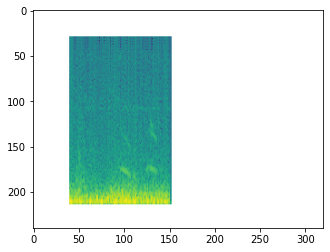

In [79]:
## 이미지 입력 및 전처리



img_path = './fail656.png'
# target PIL(Python Image Library)
img_fail = image.load_img(img_path, target_size=(240,320,3)) 

# (240, 320, 3)에 numpy float32 배열
img_x = image.img_to_array(img_fail)

# 차원 추가 3d -> 4d
img_x_4d = np.expand_dims(img_x, axis=0)

# 정규화
img_x_4d /= 255.


plt.imshow(img_x_4d[0])


In [25]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

In [81]:
## Grad_CAM 알고리즘
# 층 가져오기 = model cnn 마지막층
last_conv_layer = model.get_layer('conv2d_39')

grads = K.gradients(model.output, last_conv_layer)[0]

pooled_grads = K.mean(grads, axis=(0,1,2))

iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0], last_conv_layer.output])

pooled_grads_value, conv_layer_output_value, output = iterate([img_x_4d])

print(pooled_grads_value.shape, conv_layer_output_value.shape, output.shape)


for i in range(128):
    conv_layer_output_value[:,:,i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)
# 만들어진 특성 맵에서 채널 축을 따라 평균한 값이 클래스 활성화의 히트맵이다.

heatmap = np.maximum(heatmap,0)
heatmap /= np.max(heatmap)

plt.matshow(heatmap)

TypeError: ignored